In [1]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from keyname import keyname as kn
from matplotlib import colors as mpl_colors
from teeplot import teeplot as tp

import Bio
import alifedata_phyloinformatics_convert as apc
import csv
import glob
import itertools
import json
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import urllib.request as request
import io
from copy import deepcopy

from etlib.SortableTree.SortableTree import SortableTree, to_tril, fix_branch_length
from etlib.PlotTools.PlotTools import enable_pretty_graphing, set_color
enable_pretty_graphing()

In [2]:
morphs = {x['stint']: x[' morph'][1:] for x in pd.read_csv('morphs_by_stint.csv').to_dict(orient='records')}

In [3]:
new_tree = Phylo.read("data/scipy_linkage_tree.xml", "phyloxml")
print(new_tree)

Phylogeny(rooted=True)
    Clade()
        Clade(name='0 (a)')
            Clade(name='0 (a)')
            Clade(name='1 (b)')
        Clade(name='10 (b)')
            Clade(name='100 (j)')
                Clade(name='100 (j)')
                    Clade(name='100 (j)')
                        Clade(name='100 (j)')
                            Clade(name='82 (e)')
                                Clade(name='82 (e)')
                                Clade(name='83 (e)')
                                    Clade(name='88 (e)')
                                    Clade(name='83 (e)')
                                        Clade(name='85 (e)')
                                            Clade(name='85 (e)')
                                            Clade(name='86 (e)')
                                        Clade(name='83 (e)')
                                            Clade(name='83 (e)')
                                            Clade(name='84 (e)')
                            Clade

teeplots/scipy_linkage_tree/viz=draw+ext=.pdf
teeplots/scipy_linkage_tree/viz=draw+ext=.png


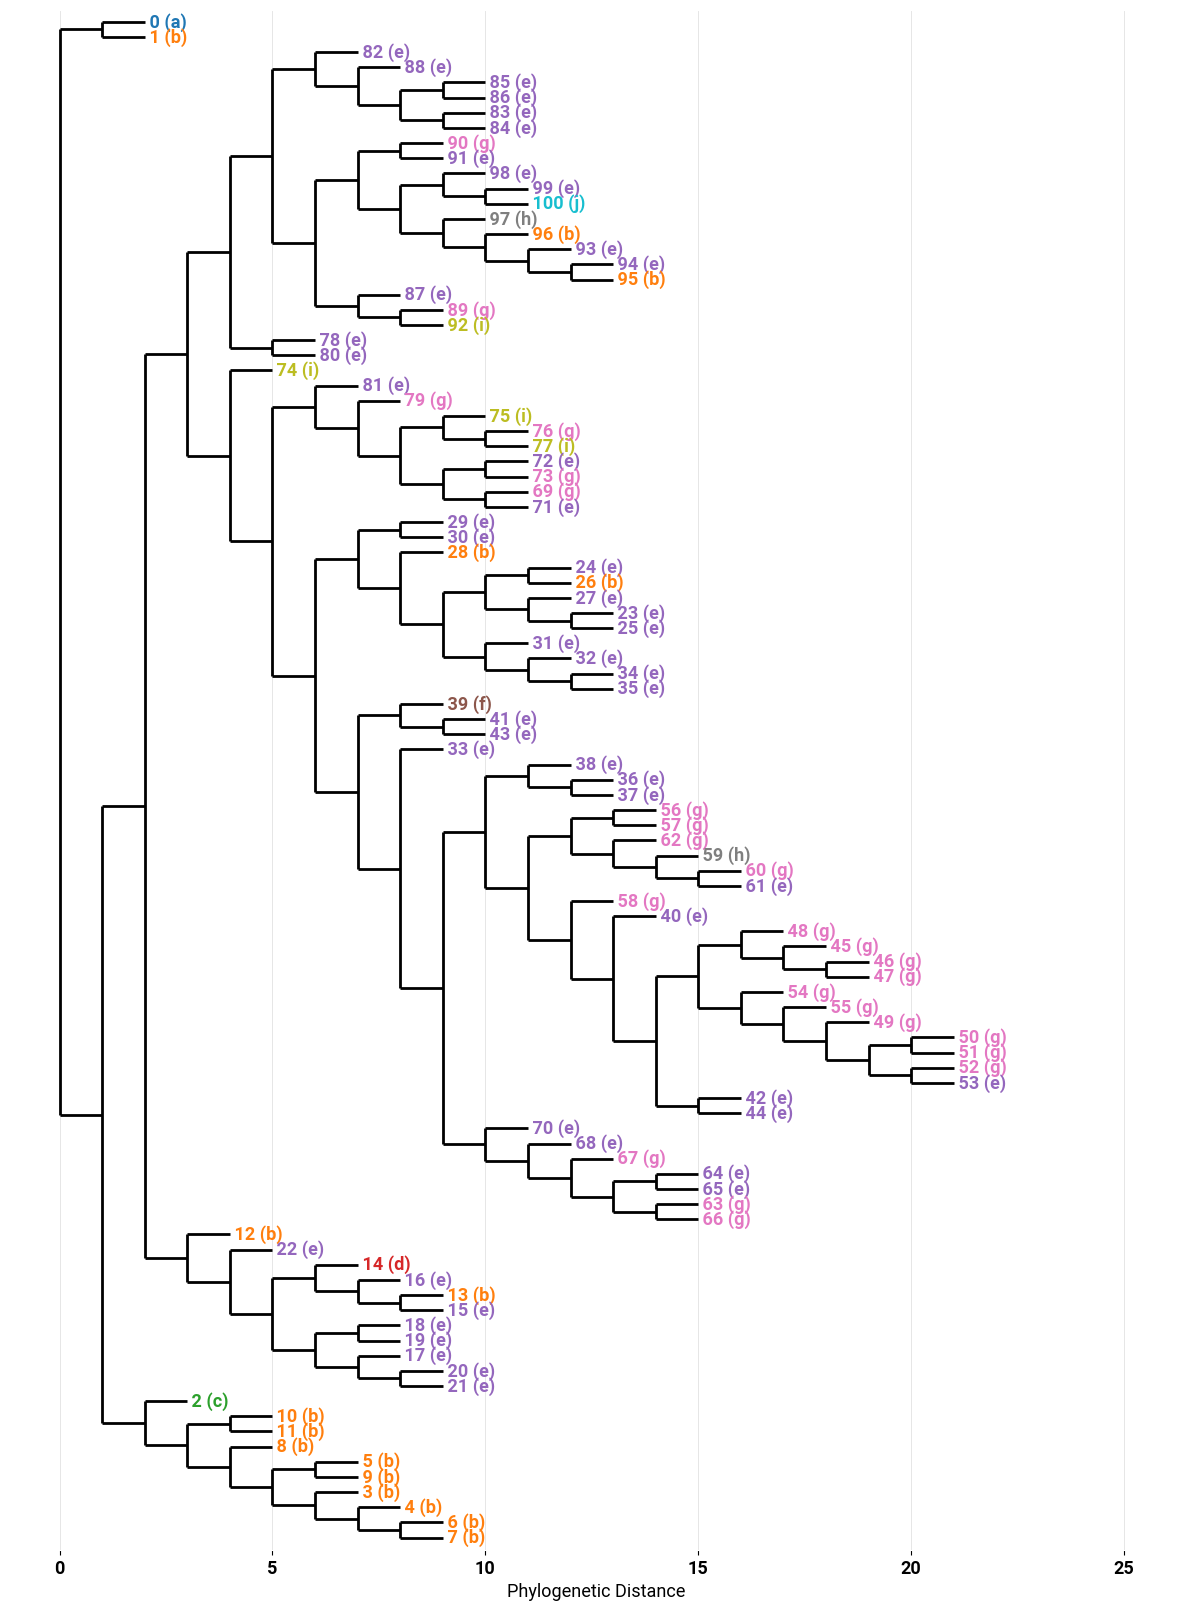

In [6]:
tp.tee(
    Phylo.draw,
    new_tree,
    label_func=lambda x: x.name if x.is_terminal() else None,
    branch_labels=None,
    label_colors=lambda x: set_color(x),
    xlabel=["Phylogenetic Distance"],
    ylabel=[""],
    yticks={"ticks": [0]},
    grid={"visible": True, "which": "both", "axis": "x", "color": "gainsboro", "linewidth": "0.5"},
    do_show=False,
    teeplot_subdir="scipy_linkage_tree"
)

In [ ]:
no_outliers_tree = deepcopy(new_tree)
no_outliers_tree.prune(target=lambda x: x.name == '0 (a)')
no_outliers_tree.prune(target=lambda x: x.name == '1 (b)')

In [ ]:
tp.tee(
    Phylo.draw,
    no_outliers_tree,
    label_func=lambda x: x.name if x.is_terminal() else None,
    branch_labels=None,
    label_colors=lambda x: set_color(x),
    xlabel=["Phylogenetic Distance"],
    ylabel=[""],
    yticks={"ticks": [0]},
    grid={"visible": True, "which": "both", "axis": "x", "color": "gainsboro", "linewidth": "0.5"},
    do_show=False,
    teeplot_subdir="scipy_linkage_tree_no_outliers"
)